In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,CategoricalNB,GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns


In [9]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\tycs\disease.csv")

In [10]:
df.head(11)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [11]:
df.tail(15)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
334,Prostate Cancer,Yes,Yes,No,No,70,Male,High,Normal,Negative
335,Schizophrenia,No,Yes,Yes,No,70,Male,Normal,Normal,Negative
336,Gout,Yes,No,Yes,No,70,Female,Normal,High,Positive
337,Migraine,No,No,Yes,No,70,Female,Normal,Normal,Positive
338,Stroke,No,Yes,No,No,70,Male,Normal,High,Positive
339,Stroke,No,Yes,No,No,70,Male,Normal,High,Positive
340,Testicular Cancer,No,No,Yes,No,70,Female,High,High,Positive
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Disease']=le.fit_transform(df['Fever'])
df['Cough']=le.fit_transform(df['Cough'])
df['Fever']=le.fit_transform(df['Fever'])
df['Fatigue']=le.fit_transform(df['Fatigue'])
df['Blood Pressure']=le.fit_transform(df['Blood Pressure'])
df['Cholesterol Level']=le.fit_transform(df['Cholesterol Level'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    int64 
 1   Fever                 349 non-null    int64 
 2   Cough                 349 non-null    int64 
 3   Fatigue               349 non-null    int64 
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    int64 
 8   Cholesterol Level     349 non-null    int64 
 9   Outcome Variable      349 non-null    object
dtypes: int64(7), object(3)
memory usage: 27.4+ KB


In [21]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,1,1,0,1,Yes,19,Female,1,2,Positive
1,0,0,1,1,No,25,Female,2,2,Negative
2,0,0,1,1,No,25,Female,2,2,Negative
3,1,1,1,0,Yes,25,Male,2,2,Positive
4,1,1,1,0,Yes,25,Male,2,2,Positive


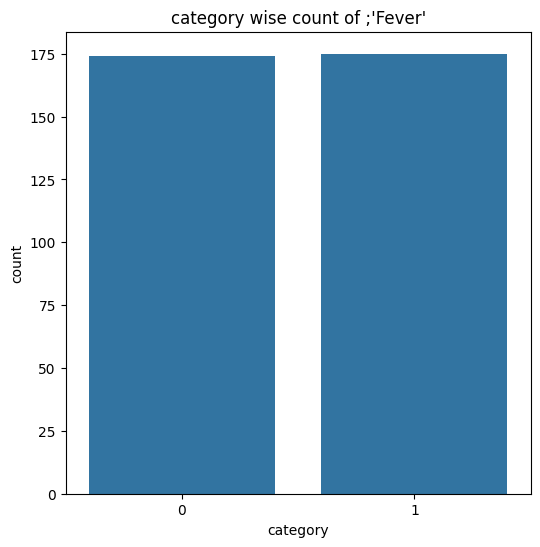

In [23]:
fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(x=df['Fever'],data=df)
plt.title("category wise count of ;'Fever'")
plt.xlabel("category")
plt.ylabel("count")
plt.show()

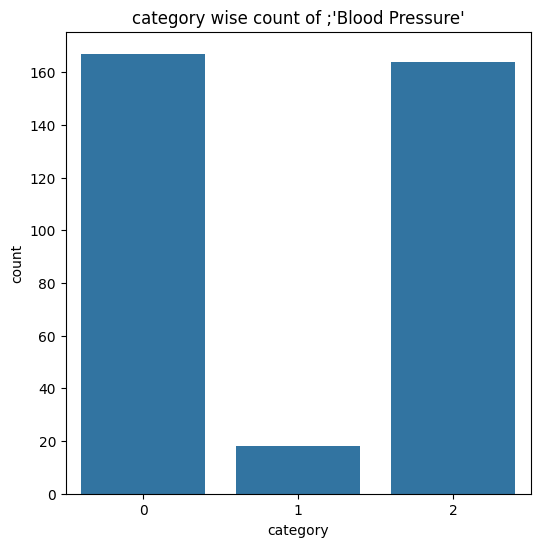

In [24]:
fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(x=df['Blood Pressure'],data=df)
plt.title("category wise count of ;'Blood Pressure'")
plt.xlabel("category")
plt.ylabel("count")
plt.show()

In [25]:
x=df.drop('Disease',axis=1)
y=df['Disease']